Importing Libraries

In [8]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision,Recall
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Lambda, Input
batch_size=32
img_size=(128,128)
SEED=111
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)
class_names=["glioma","meningioma","notumor","pituitary"]

In [9]:
batch_size=32
image_size=(229,229)
SEED=111
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [10]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest",
                                   validation_split=0.1)

train_data = train_datagen.flow_from_directory("Training",
                                               target_size=img_size,
                                               batch_size=batch_size,
                                               class_mode="categorical",
                                               seed=SEED,
                                               subset="training",
                                               color_mode="rgb")

val_data = train_datagen.flow_from_directory("Training",
                                             target_size=img_size,
                                             batch_size=batch_size,
                                             class_mode="categorical",
                                             seed=SEED,
                                             subset="validation",
                                             color_mode="rgb")
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory("Testing",
                                             target_size=img_size,
                                             batch_size=batch_size,
                                             class_mode="categorical",
                                             shuffle=False,
                                             color_mode="rgb")

Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [11]:
unique_label=[]
unique_imag=[]
class_names=["glioma","meningioma","notumor","pituitary"]
for image,labels in test_data:
  for img,label in zip(image,labels):
      label_index=np.argmax(label)
      if label_index not in unique_label:
        unique_imag.append(img)
        unique_label.append(label_index)
      if len(unique_label)==4:
        break
  if len(unique_label)==4:
    break

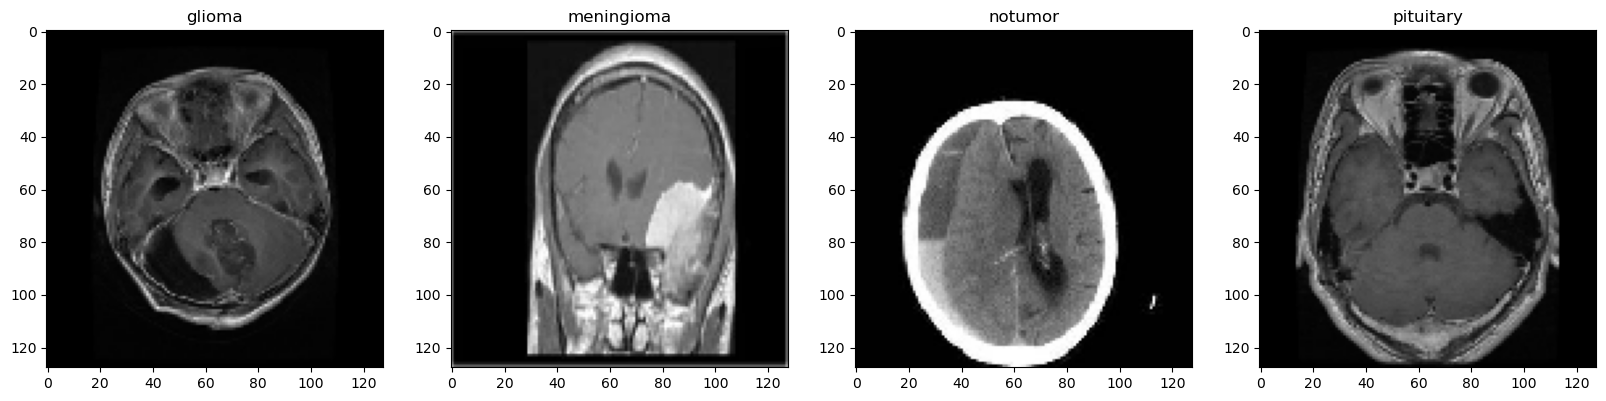

In [12]:
fig,ax=plt.subplots(1,4,figsize=(20,20))
for idx,img in enumerate(unique_imag):
  ax[idx].imshow(img)
  ax[idx].title.set_text(class_names[unique_label[idx]])

In [6]:
from tensorflow.keras.layers import Reshape, LSTM, Input, Flatten, Dropout, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Define the model
img_shape = (img_size[0], img_size[1], 3)

# Define input layer
input_layer = Input(shape=img_shape)

# Load Xception base model with imagenet weights
base_model = Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Add custom layers on top of the base model using the Functional API
x = base_model(input_layer)
x = Flatten()(x)

# Reshape for LSTM layer
x = Reshape((-1, 128))(x)  # Adjust dimensions to be compatible with LSTM

# Add LSTM layer
x = LSTM(64, activation='relu')(x)

# Add dense layers
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.25)(x)

# Output layer
output_layer = Dense(len(class_names), activation='softmax')(x)

# Combine into a new model
model_lstm = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_lstm.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train the model
history_lstm = model_lstm.fit(train_data,
                              steps_per_epoch=train_data.samples//batch_size,
                              validation_data=val_data,
                              validation_steps=val_data.samples//batch_size,
                              epochs=25)


I0000 00:00:1738695011.076803    1243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738695011.365239    1243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738695011.365341    1243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738695011.373815    1243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738695011.373894    1243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/25


I0000 00:00:1738695031.780885    4947 service.cc:146] XLA service 0x7f8dac004500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738695031.780925    4947 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-02-04 18:50:32.378270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-04 18:50:34.029378: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900
E0000 00:00:1738695056.801324    4947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738695057.041192    4947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsigh

  6/160 ━━━━━━━━━━━━━━━━━━━━ 47s 308ms/step - accuracy: 0.2560 - loss: 1.4231 - precision: 0.5000 - recall: 0.0128

E0000 00:00:1738695094.592630    4942 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738695094.833401    4942 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738695095.059469    4942 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738695096.465782    4942 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738695096.710137    4942 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.7299 - loss: 0.6847 - precision: 0.8657 - recall: 0.5986

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 157s 619ms/step - accuracy: 0.7307 - loss: 0.6829 - precision: 0.8661 - recall: 0.5998 - val_accuracy: 0.8768 - val_loss: 0.3869 - val_precision: 0.8952 - val_recall: 0.8640
Epoch 2/25
  1/160 ━━━━━━━━━━━━━━━━━━━━ 46s 290ms/step - accuracy: 0.9375 - loss: 0.4773 - precision: 0.9375 - recall: 0.9375

2025-02-04 18:52:51.577848: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-04 18:52:51.578297: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9375 - loss: 0.4773 - precision: 0.9375 - recall: 0.9375 - val_accuracy: 0.9600 - val_loss: 0.1853 - val_precision: 0.9600 - val_recall: 0.9600
Epoch 3/25


2025-02-04 18:52:58.884016: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 396ms/step - accuracy: 0.9467 - loss: 0.1799 - precision: 0.9601 - recall: 0.9306 - val_accuracy: 0.8787 - val_loss: 0.3649 - val_precision: 0.8893 - val_recall: 0.8713
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 1.0000 - loss: 0.0544 - precision: 1.0000 - recall: 0.9688 - val_accuracy: 0.8400 - val_loss: 0.3003 - val_precision: 0.8750 - val_recall: 0.8400
Epoch 5/25


2025-02-04 18:54:02.919464: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 396ms/step - accuracy: 0.9722 - loss: 0.0915 - precision: 0.9758 - recall: 0.9653 - val_accuracy: 0.9559 - val_loss: 0.1259 - val_precision: 0.9592 - val_recall: 0.9504
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9375 - loss: 0.0544 - precision: 0.9375 - recall: 0.9375 - val_accuracy: 0.9600 - val_loss: 0.0335 - val_precision: 0.9600 - val_recall: 0.9600
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 397ms/step - accuracy: 0.9853 - loss: 0.0520 - precision: 0.9870 - recall: 0.9828 - val_accuracy: 0.9577 - val_loss: 0.2175 - val_precision: 0.9612 - val_recall: 0.9559
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 1.0000 - loss: 0.0122 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.0540 - val_precision: 0.9600 - val_recall: 0.9600
Epoch 9/25


2025-02-04 18:56:10.985084: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 395ms/step - accuracy: 0.9867 - loss: 0.0485 - precision: 0.9881 - recall: 0.9851 - val_accuracy: 0.9651 - val_loss: 0.1166 - val_precision: 0.9651 - val_recall: 0.9651
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 1.0000 - loss: 0.0325 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.0872 - val_precision: 0.9600 - val_recall: 0.9600
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 389ms/step - accuracy: 0.9896 - loss: 0.0318 - precision: 0.9911 - recall: 0.9886 - val_accuracy: 0.9669 - val_loss: 0.2016 - val_precision: 0.9669 - val_recall: 0.9669
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 1.0000 - loss: 0.0195 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0248 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 13/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 391ms/step - accuracy: 0.9923 - loss: 0.0300 - precision: 0.9941 - recall: 0.9912 - val_accuracy: 0.9743 - val_lo

2025-02-04 19:00:26.274058: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 400ms/step - accuracy: 0.9957 - loss: 0.0167 - precision: 0.9960 - recall: 0.9948 - val_accuracy: 0.9743 - val_loss: 0.0994 - val_precision: 0.9743 - val_recall: 0.9743
Epoch 18/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 1.0000 - loss: 0.0088 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0173 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 19/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 389ms/step - accuracy: 0.9955 - loss: 0.0152 - precision: 0.9967 - recall: 0.9947 - val_accuracy: 0.9761 - val_loss: 0.0729 - val_precision: 0.9778 - val_recall: 0.9724
Epoch 20/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 1.0000 - loss: 1.0529e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0067 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 21/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 395ms/step - accuracy: 0.9952 - loss: 0.0146 - precision: 0.9958 - recall: 0.9943 - val_accuracy: 0.9779 - va

In [7]:
import pickle
with open('history_lstm.pkl', 'wb') as file:
    pickle.dump(history_lstm.history, file)

In [8]:
test_loss, test_accuracy, test_precision, test_recall = model_lstm.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 340ms/step - accuracy: 0.9952 - loss: 0.0203 - precision: 0.9965 - recall: 0.9952
Test Accuracy: 0.9946605563163757
Test Precision: 0.9954198598861694
Test Recall: 0.9946605563163757


In [7]:
history = model.fit(train_data,
                    steps_per_epoch=train_data.samples//batch_size,
                    validation_data=val_data,
                    validation_steps=val_data.samples//batch_size,
                    epochs=25)

# Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


I0000 00:00:1731783890.410710     903 service.cc:146] XLA service 0x7fa4980040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731783890.410812     903 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-16 19:04:51.107648: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-16 19:04:53.101716: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900
E0000 00:00:1731783915.904887     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731783916.151651     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsigh

 67/160 ━━━━━━━━━━━━━━━━━━━━ 1:01 657ms/step - accuracy: 0.6052 - loss: 0.9685 - precision_1: 0.8328 - recall_1: 0.3600

E0000 00:00:1731783999.765796     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731783999.996645     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731784001.383566     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731784001.585252     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731784001.853273     903 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.7186 - loss: 0.7214 - precision_1: 0.8765 - recall_1: 0.5532

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 223s 963ms/step - accuracy: 0.7193 - loss: 0.7197 - precision_1: 0.8768 - recall_1: 0.5545 - val_accuracy: 0.8401 - val_loss: 0.4406 - val_precision_1: 0.8493 - val_recall_1: 0.8290
Epoch 2/25
  1/160 ━━━━━━━━━━━━━━━━━━━━ 46s 290ms/step - accuracy: 0.9375 - loss: 0.1464 - precision_1: 0.9667 - recall_1: 0.9062

2024-11-16 19:08:08.571873: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-16 19:08:08.572150: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9375 - loss: 0.1464 - precision_1: 0.9667 - recall_1: 0.9062 - val_accuracy: 0.8400 - val_loss: 0.6516 - val_precision_1: 0.8400 - val_recall_1: 0.8400
Epoch 3/25


2024-11-16 19:08:16.441100: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 484ms/step - accuracy: 0.9500 - loss: 0.1603 - precision_1: 0.9575 - recall_1: 0.9388 - val_accuracy: 0.9449 - val_loss: 0.1944 - val_precision_1: 0.9445 - val_recall_1: 0.9393
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9062 - loss: 0.1723 - precision_1: 0.9667 - recall_1: 0.9062 - val_accuracy: 0.9600 - val_loss: 0.1051 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 5/25


2024-11-16 19:09:34.419463: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 499ms/step - accuracy: 0.9771 - loss: 0.0846 - precision_1: 0.9798 - recall_1: 0.9712 - val_accuracy: 0.9430 - val_loss: 0.2263 - val_precision_1: 0.9423 - val_recall_1: 0.9301
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9062 - loss: 0.4322 - precision_1: 0.9355 - recall_1: 0.9062 - val_accuracy: 1.0000 - val_loss: 0.0034 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.9738 - loss: 0.0815 - precision_1: 0.9808 - recall_1: 0.9690 - val_accuracy: 0.9688 - val_loss: 0.1162 - val_precision_1: 0.9704 - val_recall_1: 0.9632
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 1.0000 - loss: 0.0076 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0096 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 9/25


2024-11-16 19:12:13.125372: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 486ms/step - accuracy: 0.9809 - loss: 0.0645 - precision_1: 0.9833 - recall_1: 0.9777 - val_accuracy: 0.9688 - val_loss: 0.1470 - val_precision_1: 0.9777 - val_recall_1: 0.9669
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9688 - loss: 0.0504 - precision_1: 0.9688 - recall_1: 0.9688 - val_accuracy: 0.9600 - val_loss: 0.0980 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.9926 - loss: 0.0352 - precision_1: 0.9935 - recall_1: 0.9915 - val_accuracy: 0.9724 - val_loss: 0.1504 - val_precision_1: 0.9742 - val_recall_1: 0.9724
Epoch 12/25
  1/160 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 1.0000 - loss: 0.0020 - precision_1: 1.0000 - recall_1: 1.0000

2024-11-16 19:14:49.694203: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17961344085257994579


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 1.0000 - loss: 0.0020 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.1263 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 13/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 486ms/step - accuracy: 0.9944 - loss: 0.0171 - precision_1: 0.9951 - recall_1: 0.9943 - val_accuracy: 0.9430 - val_loss: 0.3097 - val_precision_1: 0.9429 - val_recall_1: 0.9412
Epoch 14/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 1.0000 - loss: 0.0073 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.4511 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 15/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.9921 - loss: 0.0401 - precision_1: 0.9928 - recall_1: 0.9907 - val_accuracy: 0.9596 - val_loss: 0.1768 - val_precision_1: 0.9649 - val_recall_1: 0.9596
Epoch 16/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 1.0000 - loss: 0.0136 - precision_1: 1.0000 - recall_1: 1.0

2024-11-16 19:17:26.606175: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 117s 731ms/step - accuracy: 0.9964 - loss: 0.0134 - precision_1: 0.9965 - recall_1: 0.9959 - val_accuracy: 0.9632 - val_loss: 0.1961 - val_precision_1: 0.9667 - val_recall_1: 0.9596
Epoch 18/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4011e-04 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.0863 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 19/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 580ms/step - accuracy: 0.9971 - loss: 0.0105 - precision_1: 0.9974 - recall_1: 0.9967 - val_accuracy: 0.9688 - val_loss: 0.1307 - val_precision_1: 0.9705 - val_recall_1: 0.9688
Epoch 20/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 1.0000 - loss: 4.0807e-04 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.3173e-05 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 21/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 516ms/step - accuracy: 0.9955 - loss: 0.0174 - precision_1: 0.9965 - r

In [9]:
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, Input, Flatten, Dropout, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Define the model
img_shape = (img_size[0], img_size[1], 3)

# Define input layer
input_layer = Input(shape=img_shape)

# Load Xception base model with imagenet weights
base_model = Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Add custom layers on top of the base model using the Functional API
x = base_model(input_layer)
x = Flatten()(x)

# Reshape for LSTM layer
x = Reshape((-1, 128))(x)  # Adjust dimensions to be compatible with LSTM

# Add Bidirectional LSTM layer
x = Bidirectional(LSTM(64, activation='relu'))(x)

# Add dense layers
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.25)(x)

# Output layer
output_layer = Dense(len(class_names), activation='softmax')(x)

# Combine into a new model
model_bi_lstm = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_bi_lstm.compile(optimizer=Adamax(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy', Precision(), Recall()])

# Train the model
history_bi_lstm = model_bi_lstm.fit(train_data,
                                    steps_per_epoch=train_data.samples//batch_size,
                                    validation_data=val_data,
                                    validation_steps=val_data.samples//batch_size,
                                    epochs=25)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 102s 469ms/step - accuracy: 0.5599 - loss: 1.0126 - precision_1: 0.7109 - recall_1: 0.3282 - val_accuracy: 0.8676 - val_loss: 0.4430 - val_precision_1: 0.9430 - val_recall_1: 0.7298
Epoch 2/25
  1/160 ━━━━━━━━━━━━━━━━━━━━ 43s 272ms/step - accuracy: 0.9062 - loss: 0.1788 - precision_1: 0.9655 - recall_1: 0.8750

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9062 - loss: 0.1788 - precision_1: 0.9655 - recall_1: 0.8750 - val_accuracy: 0.8800 - val_loss: 0.3290 - val_precision_1: 0.8750 - val_recall_1: 0.8400
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.9553 - loss: 0.1478 - precision_1: 0.9647 - recall_1: 0.9432 - val_accuracy: 0.9540 - val_loss: 0.1312 - val_precision_1: 0.9626 - val_recall_1: 0.9467
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9375 - loss: 0.1092 - precision_1: 0.9375 - recall_1: 0.9375 - val_accuracy: 0.9200 - val_loss: 0.2127 - val_precision_1: 0.9583 - val_recall_1: 0.9200
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 389ms/step - accuracy: 0.9751 - loss: 0.0852 - precision_1: 0.9793 - recall_1: 0.9726 - val_accuracy: 0.8971 - val_loss: 0.3294 - val_precision_1: 0.9045 - val_recall_1: 0.8879
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 1.0000 - loss: 0.0225 - precision_1: 1.0000 - recall_1: 1.0000 - 

2025-02-04 19:11:31.965830: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.9895 - loss: 0.0424 - precision_1: 0.9910 - recall_1: 0.9876 - val_accuracy: 0.9522 - val_loss: 0.1865 - val_precision_1: 0.9539 - val_recall_1: 0.9504
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 1.0000 - loss: 0.0193 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0201 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.9914 - loss: 0.0326 - precision_1: 0.9922 - recall_1: 0.9907 - val_accuracy: 0.9559 - val_loss: 0.1859 - val_precision_1: 0.9629 - val_recall_1: 0.9540
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 1.0000 - loss: 0.0126 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 0.9600 - val_loss: 0.0526 - val_precision_1: 0.9600 - val_recall_1: 0.9600
Epoch 13/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 386ms/step - accuracy: 0.9902 - loss: 0.0296 - precision_1: 0.9905 - recall_1: 0.

In [10]:
with open('history_bi_lstm.pkl', 'wb') as file:
    pickle.dump(history_bi_lstm.history, file)

In [11]:
test_loss, test_accuracy, test_precision, test_recall = model_bi_lstm.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9921 - loss: 0.0857 - precision_1: 0.9921 - recall_1: 0.9915
Test Accuracy: 0.9931350350379944
Test Precision: 0.9931297898292542
Test Recall: 0.9923722147941589


In [14]:
from tensorflow.keras.applications import VGG16, ResNet50

# Function to create and compile model using a base model
def create_compile_model(base_model, input_shape, class_names):
    input_layer = Input(shape=input_shape)
    x = base_model(input_layer)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.25)(x)
    output_layer = Dense(len(class_names), activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])
    return model

img_shape = (img_size[0], img_size[1], 3)
# VGG16 model
base_model_vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
model_vgg16 = create_compile_model(base_model_vgg16, img_shape, class_names)
history_vgg16 = model_vgg16.fit(train_data,
                                steps_per_epoch=train_data.samples//batch_size,
                                validation_data=val_data,
                                validation_steps=val_data.samples//batch_size,
                                epochs=25)

# ResNet50 model
base_model_resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
model_resnet50 = create_compile_model(base_model_resnet50, img_shape, class_names)
history_resnet50 = model_resnet50.fit(train_data,
                                      steps_per_epoch=train_data.samples//batch_size,
                                      validation_data=val_data,
                                      validation_steps=val_data.samples//batch_size,
                                      epochs=25)


Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 68s 321ms/step - accuracy: 0.4002 - loss: 1.2741 - precision_3: 0.5202 - recall_3: 0.1783 - val_accuracy: 0.6048 - val_loss: 0.8535 - val_precision_3: 0.6485 - val_recall_3: 0.4816
Epoch 2/25


2025-02-04 20:00:12.271262: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-04 20:00:12.271340: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-02-04 20:00:12.271367: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:00:12.271400: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186
/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7500 - loss: 0.5493 - precision_3: 0.8214 - recall_3: 0.7188 - val_accuracy: 0.7600 - val_loss: 0.4722 - val_precision_3: 0.8182 - val_recall_3: 0.7200
Epoch 3/25


2025-02-04 20:00:14.079902: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-02-04 20:00:14.079958: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:00:14.079990: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.7148 - loss: 0.6741 - precision_3: 0.7623 - recall_3: 0.6508 - val_accuracy: 0.7739 - val_loss: 0.6061 - val_precision_3: 0.8341 - val_recall_3: 0.7022
Epoch 4/25


2025-02-04 20:00:54.161287: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:00:54.161342: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8438 - loss: 0.3960 - precision_3: 0.8621 - recall_3: 0.7812 - val_accuracy: 0.7600 - val_loss: 0.6241 - val_precision_3: 0.7917 - val_recall_3: 0.7600
Epoch 5/25


2025-02-04 20:00:54.393983: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-02-04 20:00:54.394034: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:00:54.394068: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 244ms/step - accuracy: 0.8099 - loss: 0.4986 - precision_3: 0.8406 - recall_3: 0.7730 - val_accuracy: 0.7849 - val_loss: 0.5530 - val_precision_3: 0.8277 - val_recall_3: 0.7592
Epoch 6/25


2025-02-04 20:01:33.685961: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:01:33.686080: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8125 - loss: 0.4177 - precision_3: 0.8125 - recall_3: 0.8125 - val_accuracy: 0.9200 - val_loss: 0.2978 - val_precision_3: 0.9583 - val_recall_3: 0.9200
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - accuracy: 0.8584 - loss: 0.3888 - precision_3: 0.8826 - recall_3: 0.8368 - val_accuracy: 0.7592 - val_loss: 0.6190 - val_precision_3: 0.7817 - val_recall_3: 0.7243
Epoch 8/25
  1/160 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 1.0000 - loss: 0.0962 - precision_3: 1.0000 - recall_3: 1.0000

2025-02-04 20:02:12.909744: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 1.0000 - loss: 0.0962 - precision_3: 1.0000 - recall_3: 1.0000 - val_accuracy: 0.6800 - val_loss: 0.6135 - val_precision_3: 0.7391 - val_recall_3: 0.6800
Epoch 9/25


2025-02-04 20:02:13.112465: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-02-04 20:02:13.112524: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:02:13.112558: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - accuracy: 0.8748 - loss: 0.3306 - precision_3: 0.8889 - recall_3: 0.8597 - val_accuracy: 0.7996 - val_loss: 0.5154 - val_precision_3: 0.8082 - val_recall_3: 0.7592
Epoch 10/25


2025-02-04 20:02:55.636195: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:02:55.636272: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9062 - loss: 0.2610 - precision_3: 0.9333 - recall_3: 0.8750 - val_accuracy: 0.6800 - val_loss: 0.5206 - val_precision_3: 0.6957 - val_recall_3: 0.6400
Epoch 11/25


2025-02-04 20:02:55.871339: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:02:55.871457: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - accuracy: 0.8912 - loss: 0.2963 - precision_3: 0.9060 - recall_3: 0.8752 - val_accuracy: 0.7868 - val_loss: 0.5882 - val_precision_3: 0.7910 - val_recall_3: 0.7721
Epoch 12/25


2025-02-04 20:03:36.446734: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:03:36.446819: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.8750 - loss: 0.2751 - precision_3: 0.8750 - recall_3: 0.8750 - val_accuracy: 0.5200 - val_loss: 0.9138 - val_precision_3: 0.5417 - val_recall_3: 0.5200
Epoch 13/25


2025-02-04 20:03:36.654710: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:03:36.654788: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.9203 - loss: 0.2206 - precision_3: 0.9322 - recall_3: 0.9083 - val_accuracy: 0.8695 - val_loss: 0.4288 - val_precision_3: 0.8902 - val_recall_3: 0.8640
Epoch 14/25


2025-02-04 20:04:17.573273: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:04:17.573329: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9062 - loss: 0.1854 - precision_3: 0.9355 - recall_3: 0.9062 - val_accuracy: 0.8400 - val_loss: 0.4229 - val_precision_3: 0.8400 - val_recall_3: 0.8400
Epoch 15/25


2025-02-04 20:04:17.825359: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:04:17.825469: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9319 - loss: 0.1888 - precision_3: 0.9403 - recall_3: 0.9265 - val_accuracy: 0.8401 - val_loss: 0.5830 - val_precision_3: 0.8555 - val_recall_3: 0.8272
Epoch 16/25


2025-02-04 20:04:57.518417: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:04:57.518490: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8750 - loss: 0.2914 - precision_3: 0.9032 - recall_3: 0.8750 - val_accuracy: 0.8000 - val_loss: 0.7481 - val_precision_3: 0.7917 - val_recall_3: 0.7600
Epoch 17/25


2025-02-04 20:04:57.724590: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-02-04 20:04:57.724666: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:04:57.724737: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 245ms/step - accuracy: 0.9349 - loss: 0.1840 - precision_3: 0.9417 - recall_3: 0.9253 - val_accuracy: 0.9062 - val_loss: 0.3056 - val_precision_3: 0.9140 - val_recall_3: 0.8989
Epoch 18/25


2025-02-04 20:05:37.142319: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:05:37.142389: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.9688 - loss: 0.1024 - precision_3: 0.9688 - recall_3: 0.9688 - val_accuracy: 0.9200 - val_loss: 0.3583 - val_precision_3: 0.9167 - val_recall_3: 0.8800
Epoch 19/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9493 - loss: 0.1364 - precision_3: 0.9538 - recall_3: 0.9477 - val_accuracy: 0.8971 - val_loss: 0.3240 - val_precision_3: 0.9134 - val_recall_3: 0.8915
Epoch 20/25


2025-02-04 20:06:16.985138: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:06:16.985207: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9375 - loss: 0.1138 - precision_3: 0.9677 - recall_3: 0.9375 - val_accuracy: 0.8000 - val_loss: 0.3981 - val_precision_3: 0.8000 - val_recall_3: 0.8000
Epoch 21/25


2025-02-04 20:06:17.213072: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:06:17.213162: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - accuracy: 0.9586 - loss: 0.1205 - precision_3: 0.9623 - recall_3: 0.9541 - val_accuracy: 0.9026 - val_loss: 0.3078 - val_precision_3: 0.9103 - val_recall_3: 0.8952
Epoch 22/25


2025-02-04 20:06:56.739897: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:06:56.739945: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 1.0000 - loss: 0.0192 - precision_3: 1.0000 - recall_3: 1.0000 - val_accuracy: 0.8800 - val_loss: 0.2075 - val_precision_3: 0.8800 - val_recall_3: 0.8800
Epoch 23/25


2025-02-04 20:06:56.980376: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:06:56.980446: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9637 - loss: 0.1019 - precision_3: 0.9674 - recall_3: 0.9602 - val_accuracy: 0.8971 - val_loss: 0.3912 - val_precision_3: 0.9115 - val_recall_3: 0.8897
Epoch 24/25


2025-02-04 20:07:36.692958: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:07:36.693082: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9688 - loss: 0.1414 - precision_3: 0.9688 - recall_3: 0.9688 - val_accuracy: 0.9200 - val_loss: 0.2249 - val_precision_3: 0.9200 - val_recall_3: 0.9200
Epoch 25/25


2025-02-04 20:07:36.938844: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.9589 - loss: 0.1167 - precision_3: 0.9612 - recall_3: 0.9561 - val_accuracy: 0.9081 - val_loss: 0.2697 - val_precision_3: 0.9125 - val_recall_3: 0.9007
Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 86s 279ms/step - accuracy: 0.7724 - loss: 1.4468 - precision_4: 0.7911 - recall_4: 0.7564 - val_accuracy: 0.2886 - val_loss: 1.5900 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9130 - loss: 0.4141 - precision_4: 0.9130 - recall_4: 0.9130 - val_accuracy: 0.0800 - val_loss: 1.6560 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.9313 - loss: 0.2005 - precision_4: 0.9373 - recall_4: 0.9205 - val_accuracy: 0.2371 - val_loss: 1.4853 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.9688 - loss: 0.0748 - precision_4: 0

2025-02-04 20:12:11.419751: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9731 - loss: 0.1098 - precision_4: 0.9755 - recall_4: 0.9714 - val_accuracy: 0.4375 - val_loss: 2.6233 - val_precision_4: 0.4447 - val_recall_4: 0.4283
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.9375 - loss: 0.1468 - precision_4: 0.9375 - recall_4: 0.9375 - val_accuracy: 0.3600 - val_loss: 3.0459 - val_precision_4: 0.3600 - val_recall_4: 0.3600
Epoch 11/25


2025-02-04 20:12:51.479032: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10336371363906645269
2025-02-04 20:12:51.479113: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15138685603808820186


160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 251ms/step - accuracy: 0.9792 - loss: 0.0585 - precision_4: 0.9817 - recall_4: 0.9786 - val_accuracy: 0.5662 - val_loss: 2.2745 - val_precision_4: 0.5722 - val_recall_4: 0.5607
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 1.0000 - loss: 0.0187 - precision_4: 1.0000 - recall_4: 1.0000 - val_accuracy: 0.6800 - val_loss: 1.8062 - val_precision_4: 0.6667 - val_recall_4: 0.6400
Epoch 13/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.9770 - loss: 0.0595 - precision_4: 0.9779 - recall_4: 0.9757 - val_accuracy: 0.8254 - val_loss: 0.5340 - val_precision_4: 0.8393 - val_recall_4: 0.8162
Epoch 14/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step - accuracy: 1.0000 - loss: 0.0112 - precision_4: 1.0000 - recall_4: 1.0000 - val_accuracy: 0.8000 - val_loss: 0.8219 - val_precision_4: 0.7917 - val_recall_4: 0.7600
Epoch 15/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.9858 - loss: 0.0487 - precision_4: 0.9867 - recall_4: 0.

In [15]:
import pickle

# Save the history object for the VGG16 model
with open('history_vgg16.pkl', 'wb') as file:
    pickle.dump(history_vgg16.history, file)

# Save the history object for the ResNet50 model
with open('history_resnet50.pkl', 'wb') as file:
    pickle.dump(history_resnet50.history, file)


In [16]:
import pickle

# Evaluate the VGG16 model on the test data
test_loss_vgg16, test_accuracy_vgg16, test_precision_vgg16, test_recall_vgg16 = model_vgg16.evaluate(test_data)

# Evaluate the ResNet50 model on the test data
test_loss_resnet50, test_accuracy_resnet50, test_precision_resnet50, test_recall_resnet50 = model_resnet50.evaluate(test_data)

# Print the evaluation results for both models
print("VGG16 Model:")
print(f"Test Loss: {test_loss_vgg16}")
print(f"Test Accuracy: {test_accuracy_vgg16}")
print(f"Test Precision: {test_precision_vgg16}")
print(f"Test Recall: {test_recall_vgg16}")

print("\nResNet50 Model:")
print(f"Test Loss: {test_loss_resnet50}")
print(f"Test Accuracy: {test_accuracy_resnet50}")
print(f"Test Precision: {test_precision_resnet50}")
print(f"Test Recall: {test_recall_resnet50}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.8981 - loss: 0.3247 - precision_3: 0.9012 - recall_3: 0.8888
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.9716 - loss: 0.1010 - precision_4: 0.9755 - recall_4: 0.9708
VGG16 Model:
Test Loss: 0.2440899908542633
Test Accuracy: 0.9214340448379517
Test Precision: 0.9243826866149902
Test Recall: 0.9138062596321106

ResNet50 Model:
Test Loss: 0.07355792820453644
Test Accuracy: 0.9809305667877197
Test Precision: 0.9831675887107849
Test Recall: 0.980167806148529


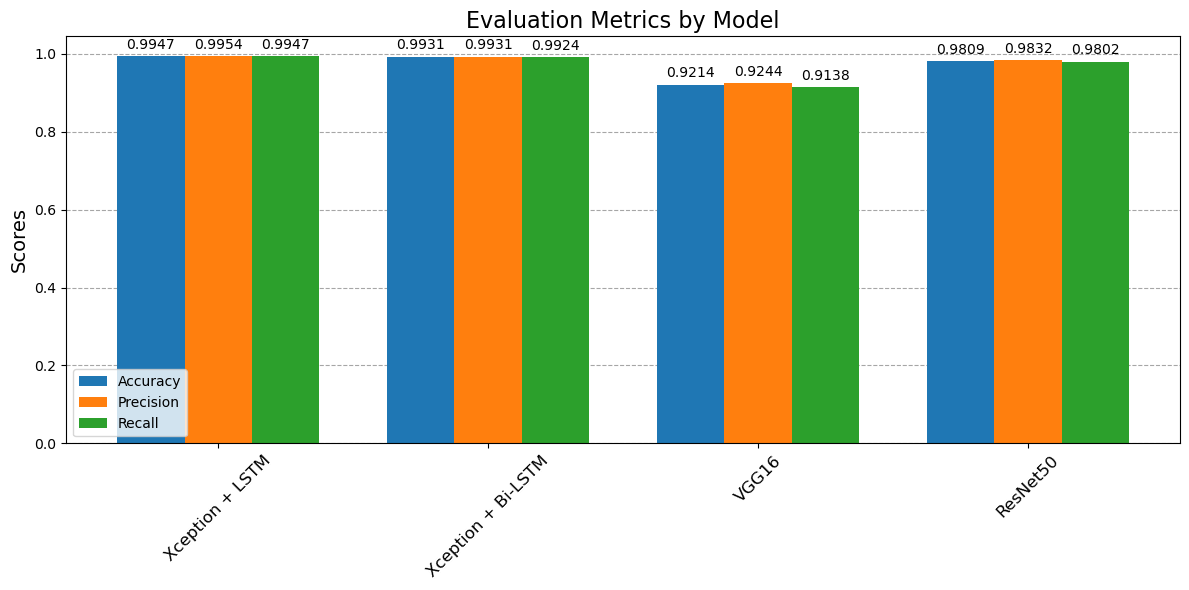

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Xception + LSTM', 'Xception + Bi-LSTM', 'VGG16', 'ResNet50']

# Evaluation metrics
accuracy = [0.9947, 0.9931, 0.9214, 0.9809]
precision = [0.9954, 0.9931, 0.9244, 0.9832]
recall = [0.9947, 0.9924, 0.9138, 0.9802]

# Create bar plots
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Customize colors with shades of blue
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x, precision, width, label='Precision', color='#ff7f0e')
rects3 = ax.bar(x + width, recall, width, label='Recall', color='#2ca02c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Evaluation Metrics by Model', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, rotation=45)
ax.legend()

# Add grid lines
ax.yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)
ax.set_axisbelow(True)

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
